In [1]:
import numpy as np
import matplotlib.pyplot as plt
from alphaexp import *
from scipy.misc import imread, imsave

%matplotlib inline

In [2]:
img1 = imread('real_images/man1.png') / 255.0
img2 = imread('real_images/man2.png') / 255.0
img3 = imread('real_images/cactus.png')[:,:,:-1] / 255.0
img4 = imread('real_images/man4.png') / 255.0
imgs = [img1, img2, img3, img4]

seed1 = np.zeros(img1.shape[:-1], np.bool)
seed1[1000:1150, 400:500] = True
# seed1[1100:1200, 650:750] = True
# seed1[1240:1350, 650:750] = True
seed2 = np.zeros(img2.shape[:-1], np.bool)
seed2[1000:1100, 1450:1550] = True
seed3 = np.zeros(img3.shape[:-1], np.bool)
seed3[1150:1250, 880:950] = True
# seed3[1250:1300, 800:850] = True
# seed3[1210:1230, 730:800] = True
seed4 = np.zeros(img4.shape[:-1], np.bool)
seed4[1000:1100, 2000:2100] = True
seeds = [seed1, seed2, seed3, seed4]

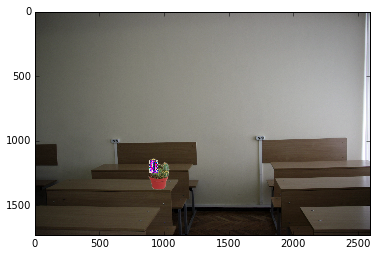

In [3]:
plt.imshow(img3 + (100 * seed3[:,:,np.newaxis]))

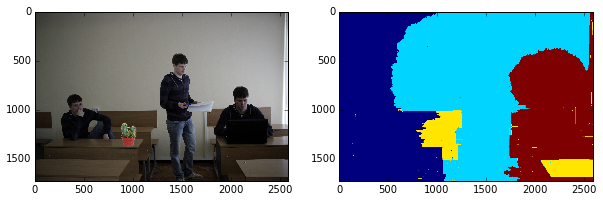

In [4]:
result_img, labels = stichImages(imgs, seeds)
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(result_img)
plt.subplot(122)
plt.imshow(labels)

In [8]:
imsave("report/images/real3c.png", img3 * (1 - seed3[:,:,np.newaxis]) + seed3[:,:,np.newaxis])

In [6]:
imsave("report/images/realc_mask.png", labels)

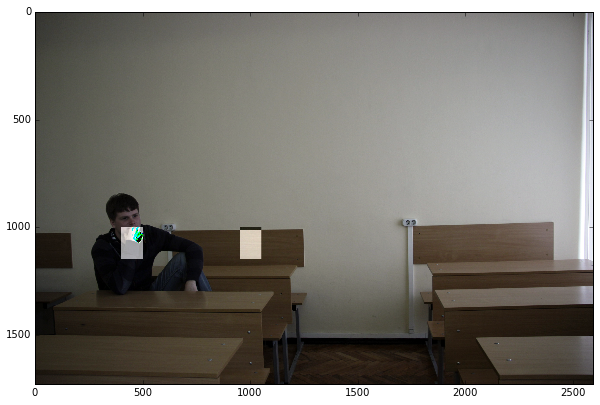

In [4]:
plt.figure(figsize=(10, 10))
plt.imshow(img1 + (100 * seed1[:,:,np.newaxis]) + (100 * seed3[:,:,np.newaxis]))

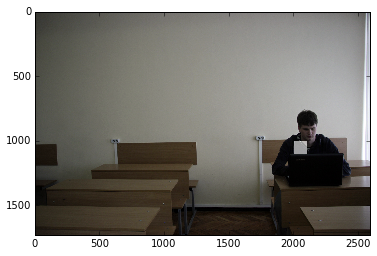

In [13]:
plt.imshow(img4 + (100 * seed4[:,:,np.newaxis]))

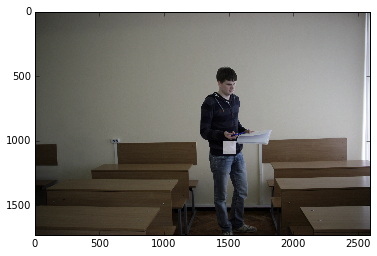

In [15]:
plt.imshow(img2 + (100 * seed2[:,:,np.newaxis]))

In [2]:
img1 = imread('model_images/img1.png')[:,:,:-1] / 255.0
img2 = imread('model_images/img2.png')[:,:,:-1] / 255.0
img3 = imread('model_images/img3.png')[:,:,:-1] / 255.0
imgs = [img1, img2, img3]

seed1 = np.zeros(img1.shape[:-1], np.bool)
seed1[40:44, 70:75] = True
seed2 = np.zeros(img2.shape[:-1], np.bool)
seed2[65:70, 160:170] = True
seed3 = np.zeros(img3.shape[:-1], np.bool)
seed3[80:85, 100:105] = True
seeds = [seed1, seed2, seed3]

In [8]:
imsave("report/images/model_mask.png", labels)

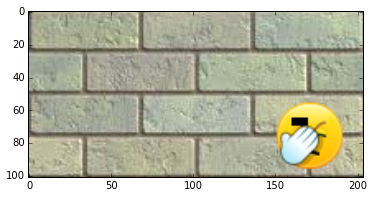

In [4]:
plt.imshow(img2 * (1 - seed2[:,:,np.newaxis]))

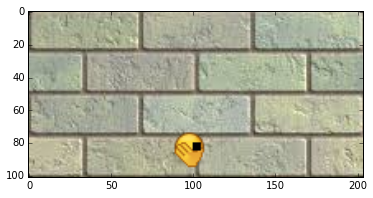

In [5]:
plt.imshow(img3 * (1 - seed3[:,:,np.newaxis]))

Start number #0
Global iteration #0
Iteration #0:
    label: 0
    energy: 54000000045.17582
Iteration #1:
    label: 2
    energy: 33000000035.501324
Iteration #2:
    label: 1
    energy: 2.5560647032261343
Global iteration #1
Iteration #0:
    label: 0
    energy: 2.5560647032261343
Iteration #1:
    label: 2
    energy: 2.5560647032261343
Iteration #2:
    label: 1
    energy: 2.5560647032261343


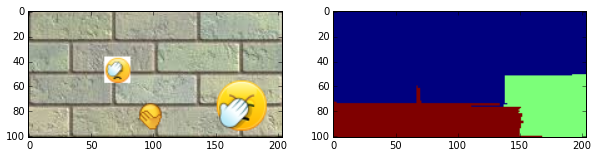

In [6]:
result_img, labels = stichImages(imgs, seeds)
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(result_img)
plt.subplot(122)
plt.imshow(labels)

In [7]:
INF = 1e9
EPS = 1e-7

imgs = np.array(imgs)
k, n, m, _ = imgs.shape
sigma = 0.005
horC = np.mean(np.exp(-(np.sum(np.diff(imgs, axis=2) ** 2, axis=-1)) ** 2 / (2 * sigma ** 2)), axis=0)
vertC = np.mean(np.exp(-(np.sum(np.diff(imgs, axis=1) ** 2, axis=-1)) ** 2 / (2 * sigma ** 2)), axis=0)
metric = np.ones((k, k)) - np.eye(k)

unary = np.zeros((n, m, k))
for i in range(k):
    indices = np.where(seeds[i][:,:,np.newaxis])
    for j in np.delete(np.arange(k), i):
        ind_j = (indices[0], indices[1], indices[2] + j)
        unary[ind_j] = INF

In [8]:
labels, energy, time = alphaExpansionGridPotts(unary, vertC, horC, metric, display=True)
result_img = np.zeros(labels.shape + (3,))
for i in range(k):
    result_img += imgs[i] * (labels == i)[:,:,np.newaxis]

Start number #0
Global iteration #0
Iteration #0:
    label: 0
    energy: 51000000054.60149
Iteration #1:
    label: 1
    energy: 19000000010.67299
Iteration #2:
    label: 2
    energy: 2.5560647032261343
Global iteration #1
Iteration #0:
    label: 0
    energy: 2.5560647032261343
Iteration #1:
    label: 1
    energy: 2.5560647032261343
Iteration #2:
    label: 2
    energy: 2.5560647032261343


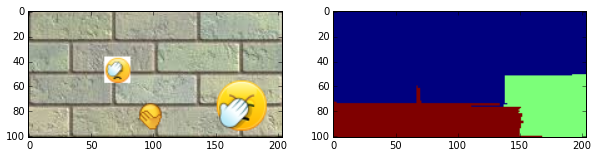

In [9]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(result_img)
plt.subplot(122)
plt.imshow(labels)

In [151]:
ind_j = (indices[0], indices[1], indices[2] + 1)

(array([40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 43, 43,
        43, 43, 43]),
 array([70, 71, 72, 73, 74, 70, 71, 72, 73, 74, 70, 71, 72, 73, 74, 70, 71,
        72, 73, 74]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [153]:
unary[(indices[0], indices[1], indices[2] + 1)].shape, unary.shape

((20,), (101, 204, 3))

In [146]:
np.where(seeds[i][:,:,np.newaxis])

(array([40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 43, 43,
        43, 43, 43]),
 array([70, 71, 72, 73, 74, 70, 71, 72, 73, 74, 70, 71, 72, 73, 74, 70, 71,
        72, 73, 74]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [150]:
ind_j = indices[:-1], indices[-1] + 1
ind_j

((array([40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 43, 43,
         43, 43, 43]),
  array([70, 71, 72, 73, 74, 70, 71, 72, 73, 74, 70, 71, 72, 73, 74, 70, 71,
         72, 73, 74])),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [30]:
small_img = img1[:2,:2]
print(img1[:2,:2,0])
print(img1[:2,:2,1]) 
print(img1[:2,:2,2])

[[ 0.57647059  0.51764706]
 [ 0.49803922  0.4627451 ]]
[[ 0.5254902   0.47058824]
 [ 0.44705882  0.42352941]]
[[ 0.49019608  0.42352941]
 [ 0.41176471  0.37647059]]


In [39]:
np.diff(small_img[:,:,0], axis=1) ** 2

array([[ 0.00346021],
       [ 0.00124567]])

In [38]:
small_img[:,:,0]

array([[ 0.57647059,  0.51764706],
       [ 0.49803922,  0.4627451 ]])

In [40]:
np.sum(np.diff(small_img, axis=1) ** 2, axis=-1)

array([[ 0.01091888],
       [ 0.00304498]])

In [2]:
INF = 1e14
k = 3
n = 4
m = 5
sigma = 0.1
model_img = np.zeros((n, m, k))
for i in range(k):
    model_img[:,:,i] = np.zeros((n, m))
model_img[0, 0:3, 0] = 1
model_img[2, 1:3, 1] = 1
model_img[3, 2, 1] = 1
model_img[1:3, 4, 1] = 1
unary = np.zeros((n, m, k))
unary[0, 0, [1, 2]] = INF
unary[0, 1, [1, 2]] = INF
unary[2, 2, [0, 2]] = INF
unary[2, 4, [0, 1]] = INF
horC = np.mean(np.exp(-(np.diff(model_img, axis=1)) ** 2 / (2 * sigma ** 2)), axis=-1)
vertC = np.mean(np.exp(-(np.diff(model_img, axis=0)) ** 2 / (2 * sigma ** 2)), axis=-1)
metric = np.ones((k, k)) - np.eye(k)

horC[horC != 1] /= 5
vertC[vertC != 1] /= 5

In [6]:
labels, energy, time = alphaExpansionGridPotts(unary, vertC, horC, metric, display=True)

Start number #0
Global iteration #0
Iteration #0:
    label: 0
    energy: 200000000000001.4
Iteration #1:
    label: 1
    energy: 100000000000000.55
Iteration #2:
    label: 2
    energy: 1.0666666666666667
Global iteration #1
Iteration #0:
    label: 0
    energy: 1.0666666666666667
Iteration #1:
    label: 1
    energy: 1.0666666666666667
Iteration #2:
    label: 2
    energy: 1.0666666666666667


In [7]:
labels

array([[0, 0, 0, 1, 1],
       [1, 1, 1, 1, 2],
       [1, 1, 1, 1, 2],
       [1, 1, 1, 1, 1]])

In [8]:
np.inf

nan

In [2]:
import numpy as np
import graph_cut

# source, sink
terminal_weights = np.array([[16,0],[13,0],[0,20],[0,4]], dtype=float)

# From, To, Capacity, Rev_Capacity
edge_weights = np.array([[0,1,10,4], [0,2,12,0], [1,2,0,9], [1,3,14,0], [2,3,0,7]], dtype=float)

(cut, labels) = graph_cut.graph_cut(terminal_weights, edge_weights)
print (cut, labels)

23.0 [0 0 1 0]


In [80]:
unary[:,:,0], unary[:,:,1], unary[:,:,2]

(array([[  1.00000000e+08,   1.00000000e+08,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00]]),
 array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   1.00000000e+08,
           0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00]]),
 array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00],
        [  0.00

In [86]:
labels

array([[0, 0, 0, 1, 1],
       [1, 1, 1, 1, 2],
       [1, 1, 1, 1, 2],
       [1, 1, 1, 1, 1]])

In [90]:
row, col = np.indices((n, m))

In [110]:
unary[row, col, labels]

array([[  1.00000000e+08,   1.00000000e+08,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+08,
          0.00000000e+00,   1.00000000e+08],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]])

In [118]:
term_weights[np.arange(n*m).reshape(n, m), 1] = unary[row, col, labels]

In [120]:
term_weights

array([[  0.00000000e+00,   1.00000000e+08],
       [  0.00000000e+00,   1.00000000e+08],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.00000000e+08],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.00000000e+08],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00]])

In [84]:
unary[labels].shape

(4, 5, 4, 5)

In [82]:
term_weights = np.zeros((n*m, 2))
for i in range(k):
    if i == alpha:
        continue
    indices = list(map(lambda x: merge_nums(*x), zip(*np.where(unary[:,:,i] == INF))))
    term_weights[indices, 0] = INF


In [81]:
labels

array([[0, 0, 0, 1, 1],
       [1, 1, 1, 1, 2],
       [1, 1, 1, 1, 2],
       [1, 1, 1, 1, 1]])

In [92]:
horC

array([[ 1.        ,  1.        ,  0.13333333,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  0.13333333],
       [ 0.13333333,  1.        ,  0.13333333,  0.13333333],
       [ 1.        ,  0.13333333,  0.13333333,  1.        ]])

In [108]:
np.random.shuffle(np.arange(10))

In [105]:
metric[labels[:,1:], labels[:,:-1]]

array([[ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.]])

In [104]:
labels[:,1:]

array([[0, 0, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 1, 1]])

In [102]:
labels[:,:-1]

array([[0, 0, 0, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [60]:
INF = 100000000
EPS = 1e-7
    
def merge_nums(i, j):
    return m * i + j

def split_nums(x):
    return x // m, x % m

In [61]:
k = 3
n = 4
m = 5
sigma = 0.1
model_img = np.zeros((n, m, k))
for i in range(k):
    model_img[:,:,i] = np.zeros((n, m))
model_img[0, 0:3, 0] = 1
model_img[2, 1:3, 1] = 1
model_img[3, 2, 1] = 1
model_img[1:3, 4, 1] = 1
unary = np.zeros((n, m, k))
unary[0, 0, 0] = INF
unary[0, 1, 0] = INF
unary[2, 2, 1] = INF
unary[2, 4, 2] = INF
horC = np.mean(np.exp(-(np.diff(model_img, axis=1)) ** 2 / (2 * sigma ** 2)), axis=-1)
vertC = np.mean(np.exp(-(np.diff(model_img, axis=0)) ** 2 / (2 * sigma ** 2)), axis=-1)
metric = np.ones((k, k)) - np.eye(k)

labels = np.random.randint(0, k, (n, m))
for i in range(k):
    labels[np.where(unary[:,:,i] == INF)] = i
horC[horC != 1] /= 5
vertC[vertC != 1] /= 5

In [63]:
def get_hor_potential(x):
    a, b = x
    return horC[split_nums(a)]

def get_vert_potential(x):
    a, b = x
    return vertC[split_nums(a)]

In [64]:
labels

array([[0, 0, 1, 2, 1],
       [1, 0, 2, 0, 1],
       [2, 2, 1, 1, 2],
       [2, 1, 0, 2, 1]])

In [76]:
alpha = 2

term_weights = np.zeros((n*m, 2))
for i in range(k):
    if i == alpha:
        continue
    indices = list(map(lambda x: merge_nums(*x), zip(*np.where(unary[:,:,i] == INF))))
    term_weights[indices, 0] = INF
    
indices = list(map(lambda x: merge_nums(*x), zip(*np.where(labels == alpha))))
term_weights[indices, 1] = INF

hor_edges = (np.arange(2*n*m) // 2)[1:-1].reshape(-1, 2)[(np.arange(n*m-1) % m != (m - 1))]
ver_edges = np.vstack((np.arange((n-1)*m), np.arange((n-1)*m) + m)).T

hor_pots = np.array(list(map(get_hor_potential, hor_edges)))[:,np.newaxis]
ver_pots = np.array(list(map(get_vert_potential, ver_edges)))[:,np.newaxis]

edge_weights = np.vstack((np.hstack((hor_edges, hor_pots, hor_pots)),
                          np.hstack((ver_edges, ver_pots, ver_pots))
               ))
(cut, alpha_labels) = graph_cut.graph_cut(term_weights, edge_weights)
labels[alpha_labels.reshape(n, m) == 1] = alpha

In [77]:
labels

array([[0, 0, 0, 1, 1],
       [1, 1, 1, 1, 2],
       [1, 1, 1, 1, 2],
       [1, 1, 1, 1, 1]])

In [66]:
term_weights

array([[  0.00000000e+00,   1.00000000e+08],
       [  0.00000000e+00,   1.00000000e+08],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.00000000e+08],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.00000000e+08],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+08,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+08,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.00000000e+08],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00]])

In [58]:
edge_weights

array([[  0.        ,   1.        ,   1.        ,   1.        ],
       [  1.        ,   2.        ,   1.        ,   1.        ],
       [  2.        ,   3.        ,   0.13333333,   0.13333333],
       [  3.        ,   4.        ,   1.        ,   1.        ],
       [  5.        ,   6.        ,   1.        ,   1.        ],
       [  6.        ,   7.        ,   1.        ,   1.        ],
       [  7.        ,   8.        ,   1.        ,   1.        ],
       [  8.        ,   9.        ,   0.13333333,   0.13333333],
       [ 10.        ,  11.        ,   0.13333333,   0.13333333],
       [ 11.        ,  12.        ,   1.        ,   1.        ],
       [ 12.        ,  13.        ,   0.13333333,   0.13333333],
       [ 13.        ,  14.        ,   0.13333333,   0.13333333],
       [ 15.        ,  16.        ,   1.        ,   1.        ],
       [ 16.        ,  17.        ,   0.13333333,   0.13333333],
       [ 17.        ,  18.        ,   0.13333333,   0.13333333],
       [ 18.        ,  19

In [153]:
(np.arange(2*n*m) // 2)[1:-1].reshape(-1, 2)[(np.arange(n*m-1) % 4 != 3)]

array([[ 0,  1],
       [ 1,  2],
       [ 2,  3],
       [ 4,  5],
       [ 5,  6],
       [ 6,  7],
       [ 8,  9],
       [ 9, 10],
       [10, 11],
       [12, 13],
       [13, 14],
       [14, 15]])

In [63]:
term_weights = np.zeros((n*m, 2))

hor_edges = (np.arange(2*n*m) // 2)[1:-1].reshape(-1, 2)[(np.arange(n*m-1) % 4 != 3)]
ver_edges = np.vstack((np.arange((n-1)*m), np.arange((n-1)*m) + m)).T

edge_weights = np.vstack((hor_edges, ver_edges))
potentials = np.array(list(map(get_potential, edge_weights)))[:,np.newaxis]
edge_weights = np.hstack((edge_weights, potentials, potentials))



In [150]:
np.arange(n*m)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])